## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

In [3]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
df= pd.read_csv("../Data/heart-disease.csv")
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.target.value_counts(ascending = True)

0    138
1    165
Name: target, dtype: int64

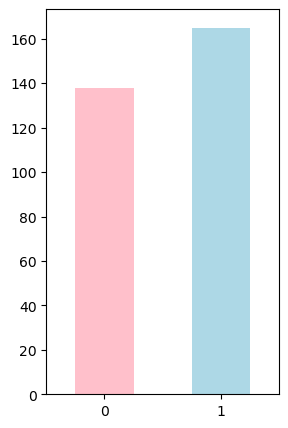

In [7]:
import matplotlib.pyplot as plt

# Create a bar chart of the target column in the dataframe, ordered in ascending order
df.target.value_counts(ascending = True).plot(
    # Set the chart type to "bar"
    kind="bar", 
    # Set the size of the chart to 3 inches wide and 5 inches tall
    figsize=(3, 5),
    # Set the color of the bars to pink and lightblue
    color=["pink","lightblue"]
)

# Rotate the x-axis labels to make them easier to read
plt.xticks(rotation=0);


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
pd.crosstab(df["target"], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


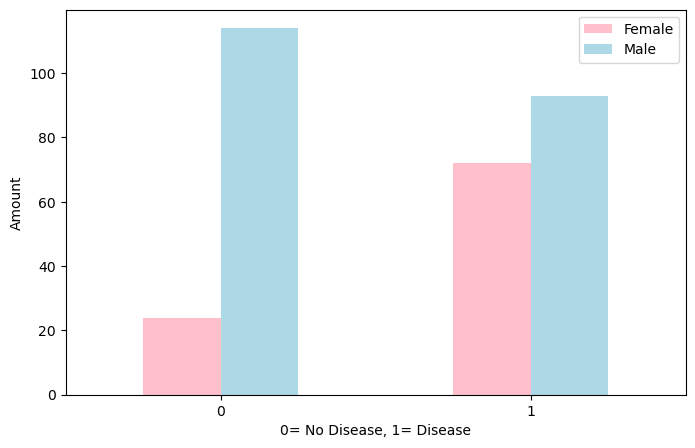

In [11]:
# Import pandas library 
import pandas as pd

# Create a cross-tabulation (crosstab) of the target column and the sex column in the dataframe
pd.crosstab(df["target"], df['sex']).plot(
    # Set the chart type to "bar"
    kind="bar", 
    # Set the size of the chart to 8 inches wide and 5 inches tall
    figsize=(8, 5),
    # Set the color of the bars to pink and lightblue
    color =["pink", "lightblue"]
)

# Add a legend to the chart, with the labels "Female" and "Male"
plt.legend(["Female", "Male"])

# Add a label to the x-axis indicating that 0 represents no disease and 1 represents disease
plt.xlabel("0= No Disease, 1= Disease")

# Add a label to the y-axis indicating that it represents the amount
plt.ylabel("Amount")

# Rotate the x-axis labels to make them easier to read
plt.xticks(rotation=0);


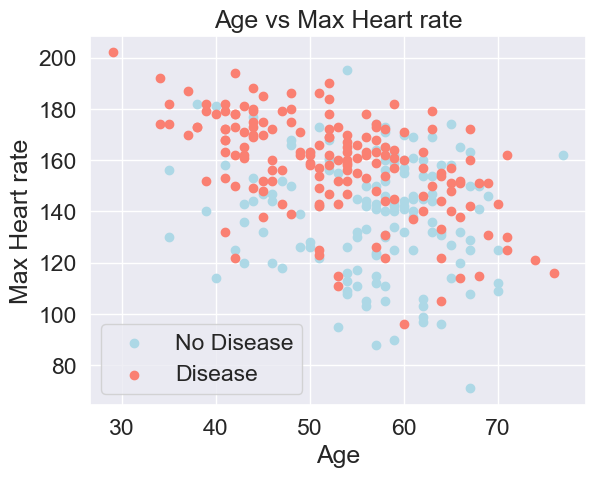

In [263]:
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0], 
            color= "lightblue" ) ;

plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1], 
            color= "salmon" ) ;

plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.title("Age vs Max Heart rate")
plt.legend(["No Disease", "Disease"])

<AxesSubplot: ylabel='Frequency'>

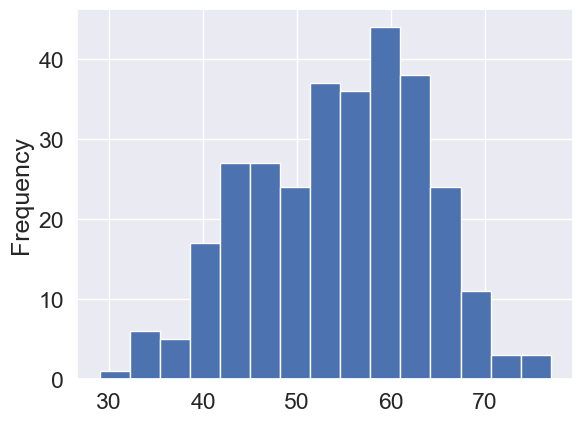

In [264]:
df.age.plot.hist(bins=15)

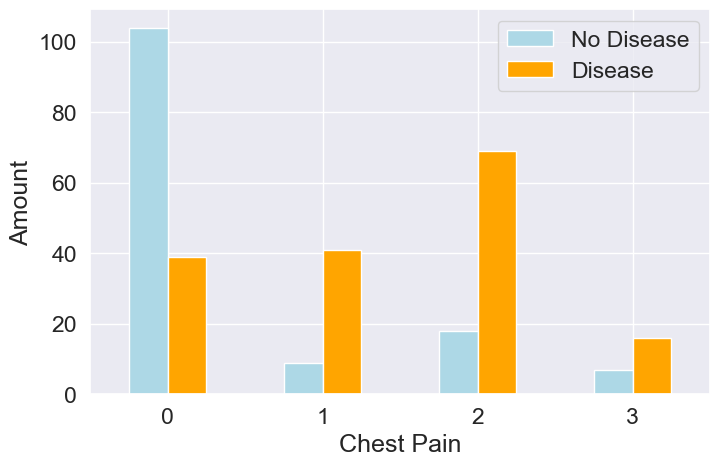

In [265]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize= (8, 5),
                                  color=["lightblue", "orange"])


plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend([ "No Disease", "Disease",])
plt.xticks(rotation=0);

In [266]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


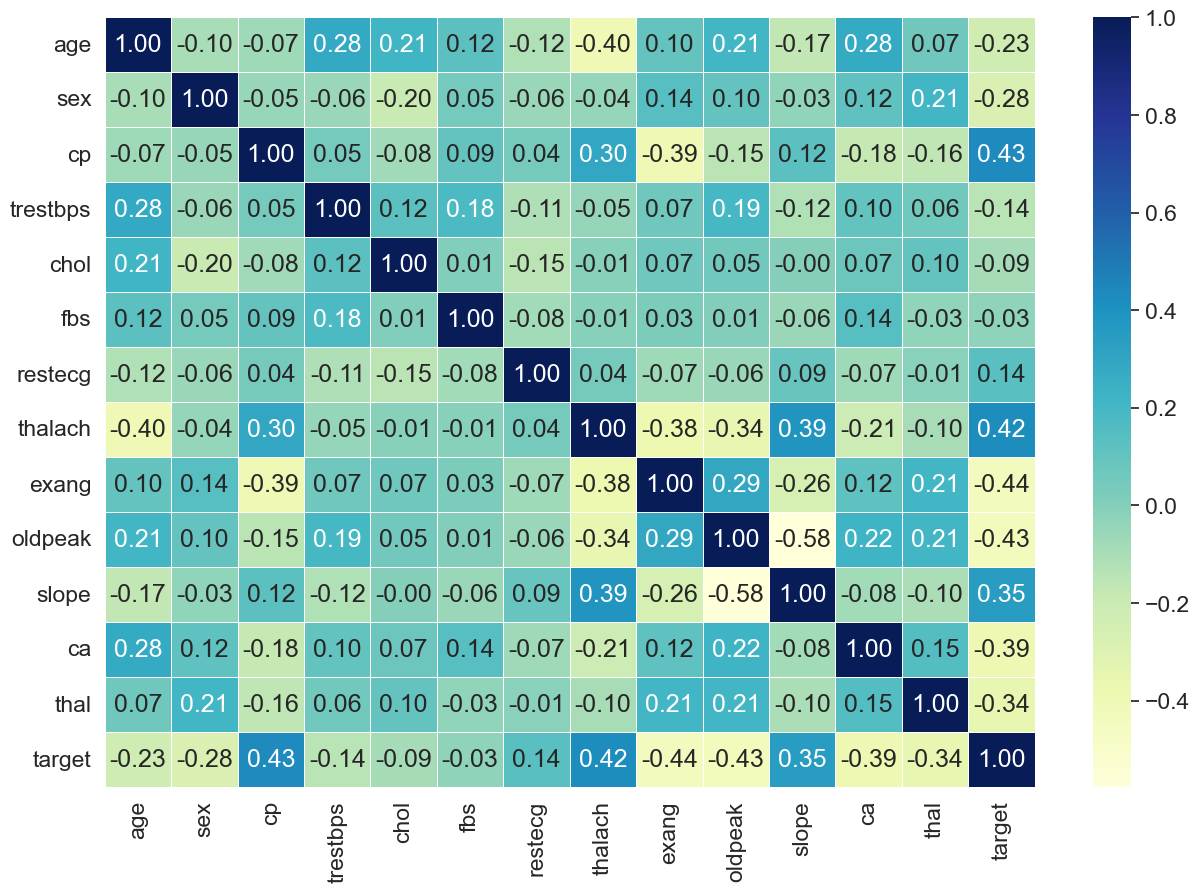

In [267]:
corr_matrix=df.corr()

fig, ax= plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, 
                annot=True, 
                linewidths= .5, 
                fmt=".2f",
                cmap= "YlGnBu")


In [268]:
X =  df.drop("target", axis=1)
y= df["target"]

In [269]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [270]:
models= {"Logistic Regression": LogisticRegression(max_iter=1000),
         "KNN": KNeighborsClassifier(), 
         "Random Forest": RandomForestClassifier()}


def fit_and_score(models, X, y):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        cross_score= cross_val_score(model, X, y, cv=5)
        model_scores[name] = cross_score.mean()
    return model_scores




In [271]:
model_scores = fit_and_score(models=models, X=X_train, y=y_train)

model_scores

{'Logistic Regression': 0.8138605442176872,
 'KNN': 0.6488095238095238,
 'Random Forest': 0.7934523809523809}

In [272]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score

best_model = max(model_scores, key=model_scores.get)
best_model = models[best_model]
y_pred = cross_val_predict(best_model, X_test, y_test, cv=5)
test_score= accuracy_score(y_test, y_pred)

test_score

0.819672131147541

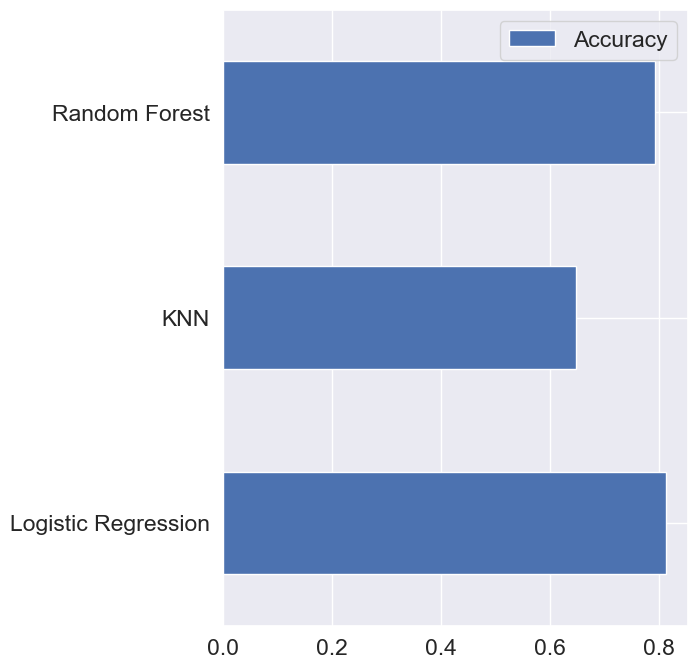

In [273]:
model_compare = pd.DataFrame(model_scores, index= ["Accuracy"]) 
model_compare.T.plot(kind="barh", figsize=(6,8));

In [274]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


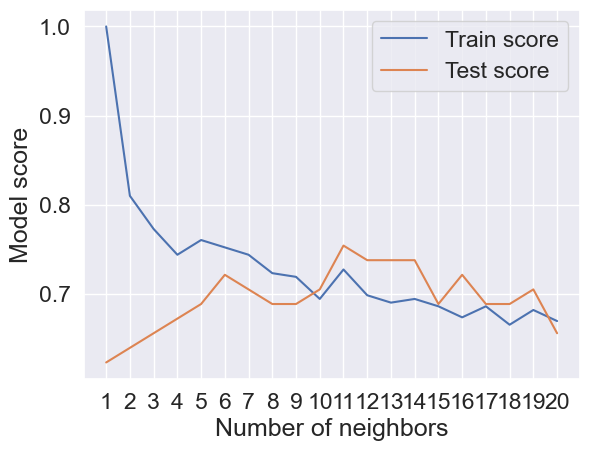

In [275]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [276]:
# Hyperturning using Randomize CV 

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

Random_forest_grid = {"n_estimators": np.arange(10, 1000, 50) ,
                      "max_depth": [None, 3, 5, 10], 
                      "min_samples_split": np.arange(2, 20, 2) , 
                      "min_samples_leaf": np.arange(1, 20, 2)}

In [277]:
np.random.seed(42)

RandomSearch_logRes= RandomizedSearchCV(LogisticRegression(), 
                                        param_distributions=log_reg_grid,
                                        cv=5,
                                        n_iter=20, 
                                        verbose=True)

RandomSearch_logRes.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [278]:
RandomSearch_logRes.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [279]:
RandomSearch_logRes.score(X_test, y_test)

0.8852459016393442

In [280]:
RandomSearch_RandomForest= RandomizedSearchCV(RandomForestClassifier(), 
                                        param_distributions=Random_forest_grid,
                                        cv=5,
                                        n_iter=20, 
                                        verbose=True)

RandomSearch_RandomForest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [281]:
RandomSearch_RandomForest.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [282]:
RandomSearch_RandomForest.score(X_test, y_test)

0.8688524590163934

In [283]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
    
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [284]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [285]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

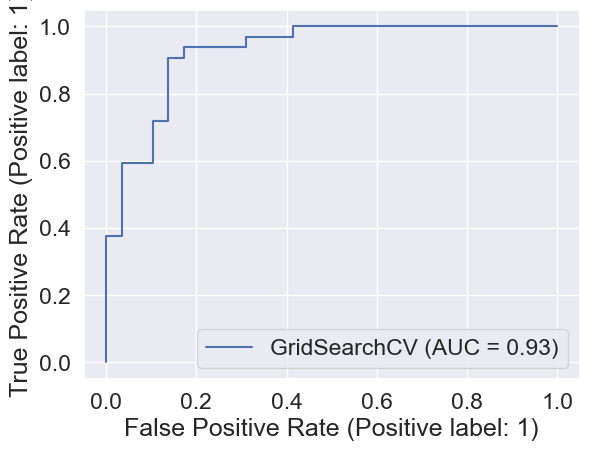

In [286]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test,y_test)

In [287]:
y_preds = gs_log_reg.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

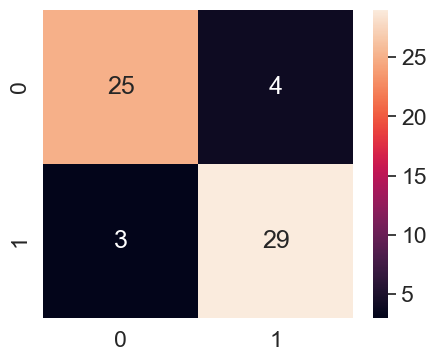

In [288]:
sns.set_theme(font_scale=1.5)

def heatmapMatrix(y_test, y_preds):
    fig, ax= plt.subplots(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_preds),
               annot=True, 
               cbar=True);

heatmapMatrix(y_test, y_preds)

In [289]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [290]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [291]:
clf = LogisticRegression(C=0.20433597178569418, solver= 'liblinear')

cv_acc= cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_prec= cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_recall= cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_f1= cross_val_score(clf, X, y, cv=5, scoring="f1")

cv_acc, cv_prec, cv_recall, cv_f1

(array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055]))

The mean score of accuracy is 0.8446994535519124
The mean score of precision is 0.8207936507936507
The mean score of recall is 0.9212121212121213
The mean score of f1 is 0.8673007976269721


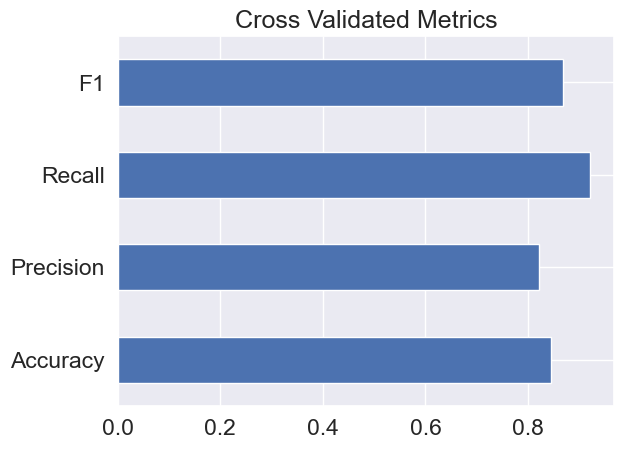

In [292]:
mean_acc= np.mean(cv_acc)
mean_prec= np.mean(cv_prec)
mean_recall= np.mean(cv_recall)
mean_f1= np.mean(cv_f1)

print(f"The mean score of accuracy is {mean_acc}")
print(f"The mean score of precision is {mean_prec}")
print(f"The mean score of recall is {mean_recall}")
print(f"The mean score of f1 is {mean_f1}")

cv_metrics= pd.DataFrame({"Accuracy":mean_acc,
                         "Precision":mean_prec, 
                         "Recall":mean_recall, 
                         "F1":mean_f1}, 
                        index=[0])
cv_metrics.T.plot.barh(title="Cross Validated Metrics", legend=False);


In [293]:
clf.fit(X_train, y_train)


LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [294]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [295]:
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


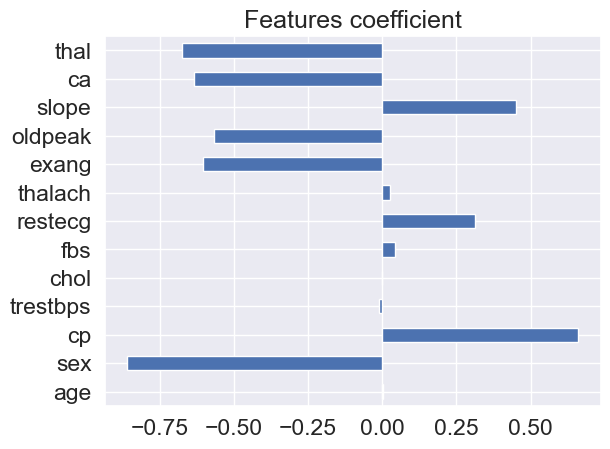

In [296]:
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(title="Features coefficient", legend=False);

feature_df

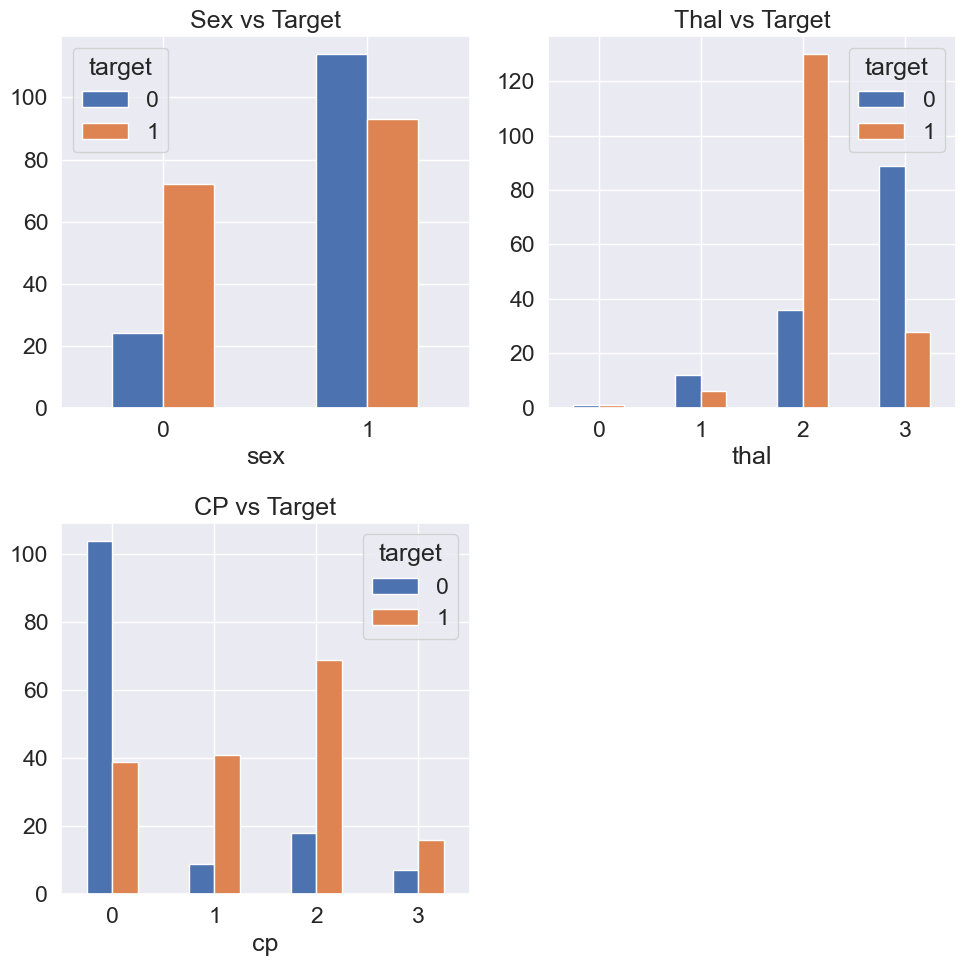

In [382]:
sex_target= pd.crosstab(df["sex"], df["target"])
thal_target = pd.crosstab(df["thal"], df["target"])
cp_target =pd.crosstab(df["cp"], df["target"])


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sex_target.plot(kind="bar", ax= axs [0][0],title="Sex vs Target")

# Use the second subplot to create a crosstab of variable1 and variable3
thal_target.plot(kind="bar", ax= axs[0][1], title="Thal vs Target")

# Use the third subplot to create a crosstab of variable2 and variable3
cp_target.plot(kind="bar", ax= axs[1][0] ,title="CP vs Target")

plt.setp(axs[0][0].get_xticklabels() + axs[0][1].get_xticklabels() + axs[1][0].get_xticklabels(), rotation=0)

fig.delaxes(axs[1][1])
plt.tight_layout();
